## Module 2
# SVM Classification: Song Emotions 

In [73]:
%matplotlib inline

import os,sys,inspect

PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH)

import pandas as pd
import numpy as np
import seaborn as sns

# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import LinearSVC


import plotly.express as px
import matplotlib.pyplot as plt
from fma_metadata import utils

import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [74]:
# read data: features
data = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/features.csv')

# read labels: song_happiness
labels = pd.read_csv('/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/src/Data (cleaned)/Labels/song_happiness_labels.csv')
label= labels.set_index('track_id')

# merge labels with data
data = data.merge(labels, on='track_id')

# remove duplicate rows
data.drop_duplicates(keep=False, inplace=True)
# remove Null values (if there are)
data.dropna()

# reset index to track_id
data = data.set_index('track_id')
data.rename({'valence': 'song_emotion'}, axis='columns', inplace=True)
# view data
data.head()

,"(chroma_cens, kurtosis, 01)","(chroma_cens, kurtosis, 02)","(chroma_cens, kurtosis, 03)","(chroma_cens, kurtosis, 04)","(chroma_cens, kurtosis, 05)","(chroma_cens, kurtosis, 06)","(chroma_cens, kurtosis, 07)","(chroma_cens, kurtosis, 08)","(chroma_cens, kurtosis, 09)","(chroma_cens, kurtosis, 10)",...,"(tonnetz, std, 05)","(tonnetz, std, 06)","(zcr, kurtosis, 01)","(zcr, max, 01)","(zcr, mean, 01)","(zcr, median, 01)","(zcr, min, 01)","(zcr, skew, 01)","(zcr, std, 01)",song_emotion
track_id,,,,,,,,,,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448,happy
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,...,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330,sad
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861,happy
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800,happy
134,0.918445,0.674147,0.577818,1.281117,0.933746,0.078177,1.199204,-0.175223,0.925482,1.438509,...,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623,happy


In [75]:
# check number of records per class
data.song_emotion.value_counts()

sad      7724
happy    5405
Name: song_emotion, dtype: int64

In [76]:
# encoding labels
le = preprocessing.LabelEncoder()
data['song_emotion'] = le.fit_transform(data['song_emotion'])
data.song_emotion.value_counts()

1    7724
0    5405
Name: song_emotion, dtype: int64

In [77]:
# remove labels from dataset 
labels = data[['song_emotion']]
data.drop('song_emotion', axis=1, inplace=True)


In [78]:
# split data in traning and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.30, random_state=42, stratify=labels,
                                                   shuffle=True) 

In [79]:
# normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
le.inverse_transform(y_train)

array(['sad', 'happy', 'sad', ..., 'sad', 'sad', 'sad'], dtype=object)

#### Visualize data in 2D with  PCA

In [81]:
from sklearn.decomposition import PCA
pca = PCA(2,random_state=42)
pca.fit(X_train)
pca_proj = pca.transform(X_train)

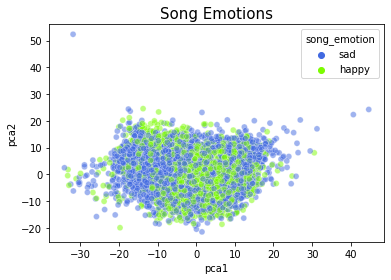

In [83]:
df = pd.DataFrame()
df['pca1'] = pca_proj[:,0]
df['pca2'] = pca_proj[:,1]
df['song_emotion'] = le.inverse_transform(y_train)
# plot scatter of PCA
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='song_emotion',
    palette={'happy':'lawngreen','sad':'royalblue'},
    data=df,
    c='black',
    legend="full",
    alpha=0.5
)
plt.title("Song Emotions", fontsize= 15)
plt.show()

In [84]:
# make sure data are np.ndarray
y_train = np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# SVM Classifier
#### Import modules

In [85]:
from sklearn.svm import SVC, LinearSVC
import random
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### SVM: Hard Margin (linear)

In [32]:
#help(LinearSVC)

In [31]:
lsvm = LinearSVC(C= 0.6, class_weight='balanced', verbose=1, random_state=42)
lsvm.fit(X_train,y_train)

[LibLinear]

LinearSVC(C=0.6, class_weight='balanced', random_state=42, verbose=1)

In [34]:
prediction_lsvm = lsvm.predict(X_test)
print(classification_report(y_test,prediction_lsvm ))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1622
           1       0.81      0.74      0.77      2317

    accuracy                           0.75      3939
   macro avg       0.74      0.75      0.74      3939
weighted avg       0.75      0.75      0.75      3939



In [ ]:
#help(GridSearchCV)

In [41]:
# Random search for C parameter in Linear SVM

params = {
    'C': [0.2, 0.5, 1, 10, 20,40, 50, 100, 300],
}

# coarse grid search
model = LinearSVC(class_weight='balanced', verbose=1, random_state=42)

gs = GridSearchCV(estimator=model, param_grid=params, cv=3, n_jobs=-1, return_train_score=True, verbose=True)
gs_result = gs.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.1min finished


[LibLinear]

In [45]:
print(f"best parameters:\n{gs_result.best_params_}\naccuracy: {gs_result.best_score_}")


best parameters:
{'C': 0.5}
accuracy: 0.7405871036632231


In [49]:
# Fine Random search for C parameter in Linear SVM

params = {
    'C': [random.uniform(0.4,0.8)],
}

# coarse grid search
model = LinearSVC(class_weight='balanced', verbose=1, random_state=42)

gs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=15, n_iter= 10,verbose=True)
gs_result = gs.fit(X_train, y_train)
print(f"best parameters:\n{gs_result.best_params_}\naccuracy: {gs_result.best_score_}")

Fitting 15 folds for each of 1 candidates, totalling 15 fits
[LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.9min finished


[LibLinear]best parameters:
{'C': 0.7849983134956344}
accuracy: 0.7429769660265773


##### First gird best model
{'C': 0.6455675716083595}
accuracy: 0.7324256326456853

##### Second grid best model
{'C': 0.43297022231553295}
accuracy: 0.7461356520132069

##### Third gird best model
{'C': 0.7849983134956344}
accuracy: 0.7429769660265773

### Retrain and test the model

In [12]:
lsvm = LinearSVC(C= 0.43297022231553295, class_weight='balanced', verbose=1, random_state=42)
lsvm.fit(X_train,y_train)

[LibLinear]

LinearSVC(C=0.43297022231553295, class_weight='balanced', random_state=42,
          verbose=1)

In [13]:
prediction_lsvm = lsvm.predict(X_test)
print(classification_report(y_test,prediction_lsvm ))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1622
           1       0.83      0.75      0.79      2317

    accuracy                           0.76      3939
   macro avg       0.76      0.76      0.76      3939
weighted avg       0.77      0.76      0.76      3939



Legend:
0: Happy
1: Sad
[[1263  359]
 [ 583 1734]]


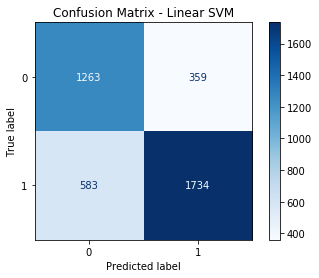

In [14]:
# confusion matrix Decision tree with PCA
print("Legend:\n0: Happy\n1: Sad")
cm = plot_confusion_matrix(lsvm,X_test, y_test,
                            cmap = plt.cm.Blues)
cm.ax_.set_title('Confusion Matrix - Linear SVM')
print(cm.confusion_matrix)
plt.show()

In [18]:
decision_function = lsvm.decision_function(X_train)
print(decision_function)

[-0.19761608 -0.56544166  1.47989113 ...  0.82443863 -0.24166548
  0.16644151]


In [30]:
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vector_indices

array([   0,    1,    4, ..., 9187, 9188, 9189])

In [31]:
support_vector_indices.shape, X_train.shape

((7429,), (9190, 518))

### SVM: Soft Margin

In [45]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

##### kernel: rbf

In [43]:
svm = SVC(kernel = 'rbf', random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [44]:
pred_svm = svm.predict(X_test)
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1622
           1       0.79      0.83      0.81      2317

    accuracy                           0.77      3939
   macro avg       0.76      0.76      0.76      3939
weighted avg       0.77      0.77      0.77      3939



##### kernel: poly

In [46]:
svm = SVC(kernel = 'poly', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [47]:
pred_svm = svm.predict(X_test)
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.72      0.45      0.56      1622
           1       0.70      0.87      0.78      2317

    accuracy                           0.70      3939
   macro avg       0.71      0.66      0.67      3939
weighted avg       0.70      0.70      0.69      3939



##### kernel: linear

In [50]:
svm = SVC(kernel = 'linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [51]:
pred_svm = svm.predict(X_test)
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1622
           1       0.79      0.80      0.79      2317

    accuracy                           0.75      3939
   macro avg       0.75      0.74      0.75      3939
weighted avg       0.75      0.75      0.75      3939



### Random Search coarse

In [ ]:
# Fine Random search for C parameter in Linear SVM
params = {
    'C': [0.2, 0.4, 0.7, 3, 10, 20, 40, 100],
    'kernel':['rbf', 'linear', 'sigmoid']
}

# coarse grid search
model_coarse = SVC(verbose=1, random_state=42)

gs_coarse = GridSearchCV(estimator=model_coarse, param_grid=params, cv=3, return_train_score=True, verbose=True)
gs_result = gs_coarse.fit(X_train, y_train)

print(f"best parameters:\n{gs_result.best_params_}\naccuracy: {gs_result.best_score_}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LibSVM]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]